In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.stats as stats
import missingno as msno
import statsmodels.api as sm
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from pandas import DataFrame
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
churn=pd.read_csv("churn_clean.csv")
churn.info()
churn.shape
churn.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [3]:
#identify missing values
churn.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [4]:
#identify duplicates
churn.duplicated()
print(churn.duplicated().value_counts())

False    10000
dtype: int64


In [5]:
#drop unused columns
churn=churn.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1)
churn.head()

,Churn,Contract,InternetService,TechSupport,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,No,One year,Fiber Optic,No,6.795513,172.455519,904.536110
1,Yes,Month-to-month,Fiber Optic,No,1.156681,242.632554,800.982766
2,No,Two Year,DSL,No,15.754144,159.947583,2054.706961
3,No,Two Year,DSL,No,17.087227,119.956840,2164.579412
4,Yes,Month-to-month,Fiber Optic,Yes,1.670972,149.948316,271.493436


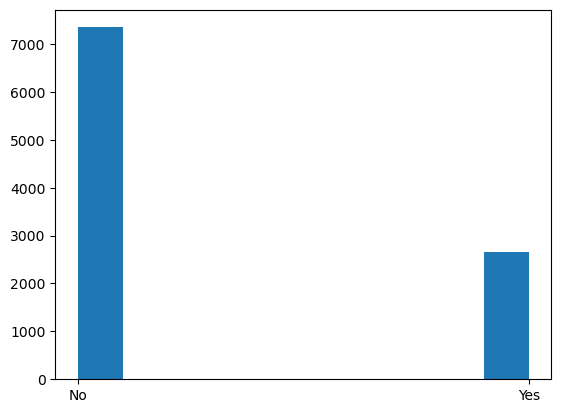

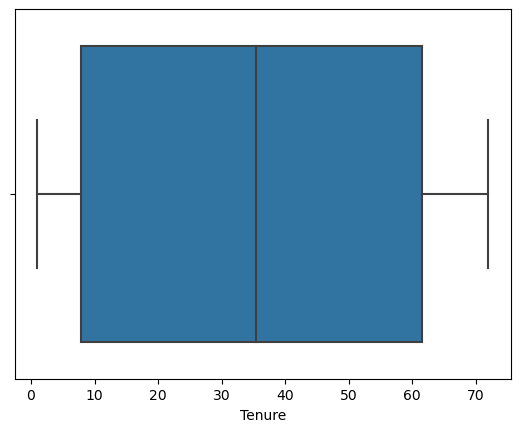

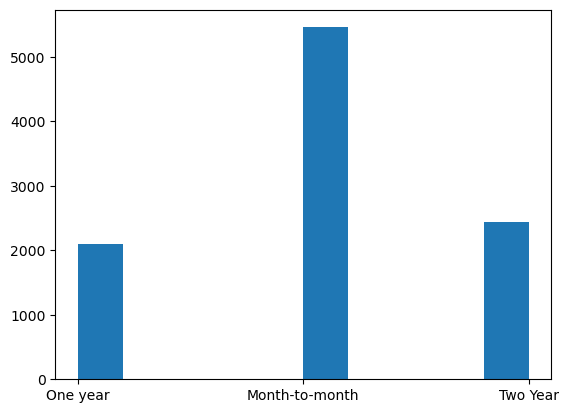

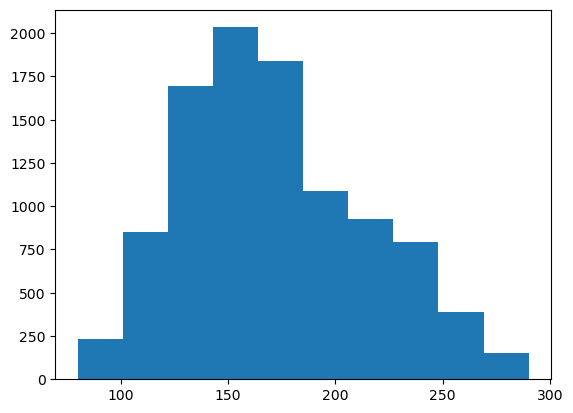

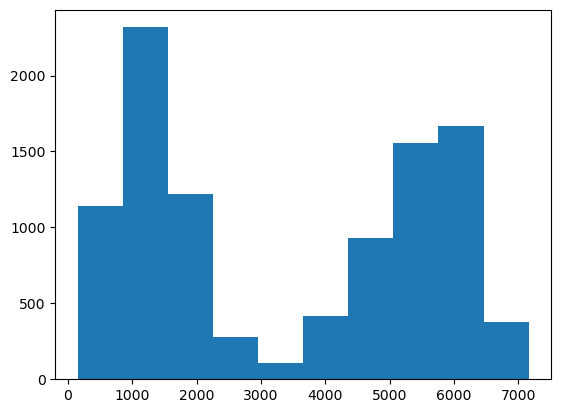

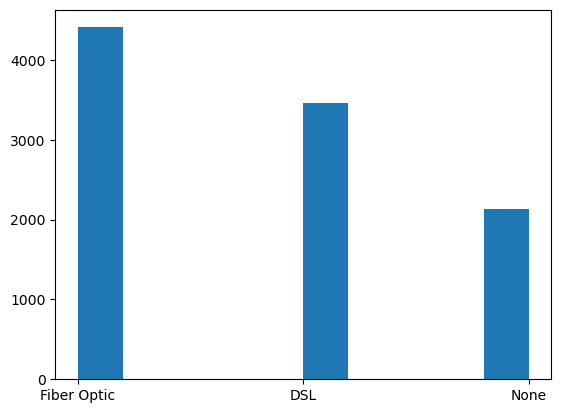

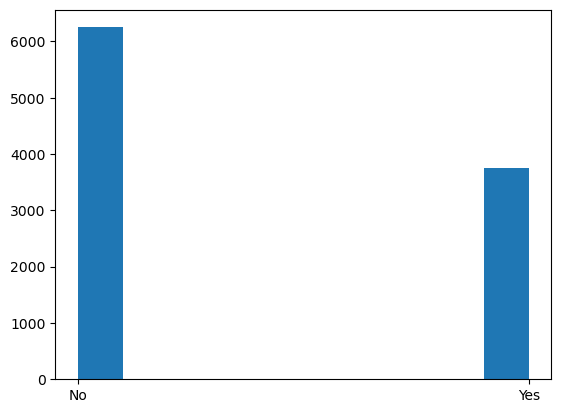

In [6]:
#identify outliers (churn, tenure, monthlycharge, bandwidth_gb_year, contract, tech support, internetservice)
plt.hist(x=churn['Churn'])
plt.show()

sb.boxplot(x=churn['Tenure'])
plt.show()

plt.hist(x=churn['Contract'])
plt.show()

plt.hist(x=churn['MonthlyCharge'])
plt.show()

plt.hist(x=churn['Bandwidth_GB_Year'])
plt.show()

plt.hist(x=churn['InternetService'])
plt.show()

plt.hist(x=churn['TechSupport'])
plt.show()

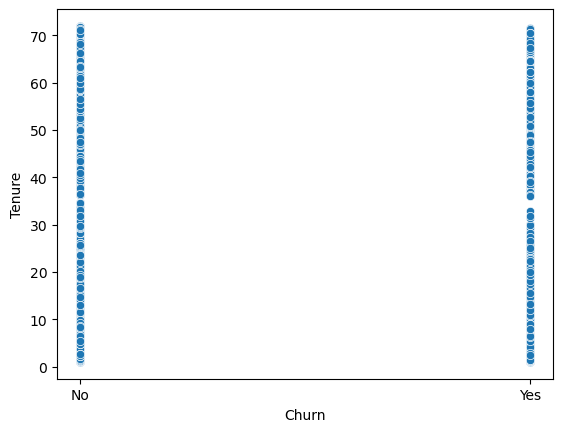

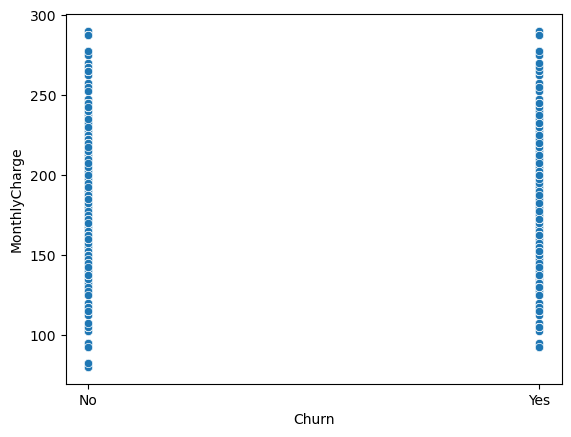

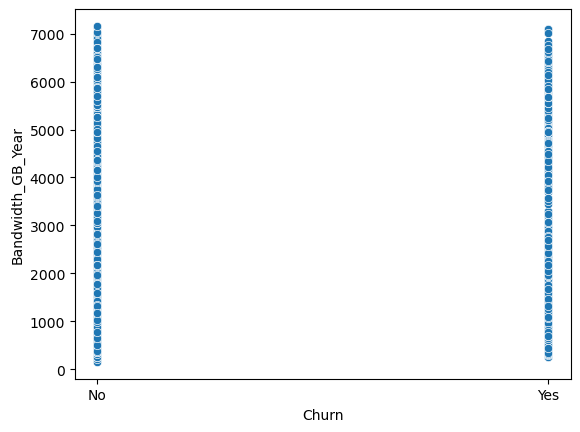

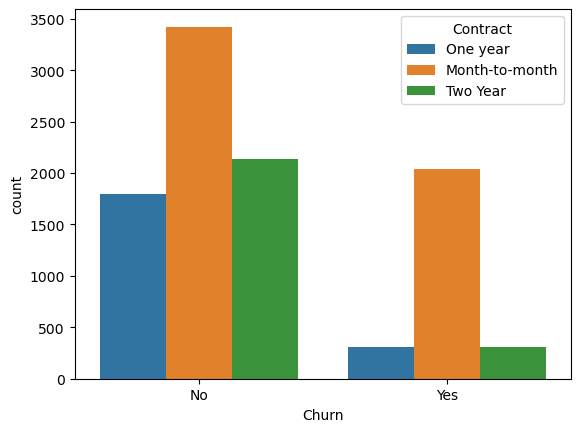

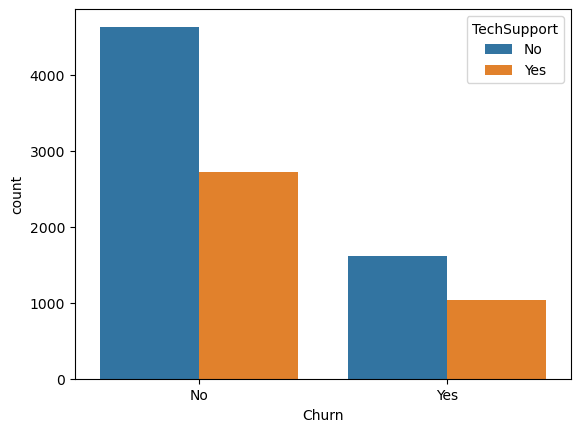

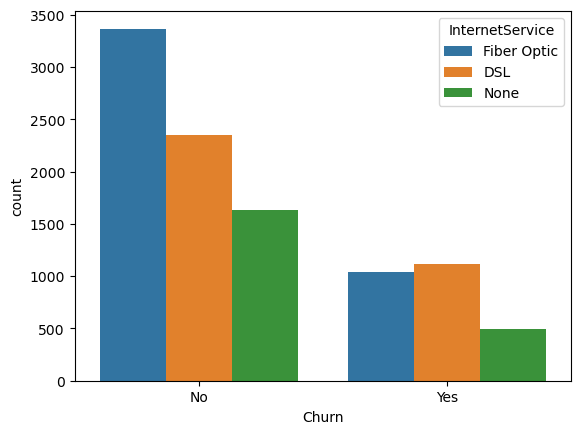

In [7]:
#bivariate graphs
sb.scatterplot(x='Churn', y='Tenure', data=churn)
plt.show()

sb.scatterplot(x='Churn', y='MonthlyCharge', data=churn)
plt.show()

sb.scatterplot(x='Churn', y='Bandwidth_GB_Year', data=churn)
plt.show()

sb.countplot(x='Churn', hue='Contract', data=churn)
plt.show()

sb.countplot(x='Churn', hue='TechSupport', data=churn)
plt.show()

sb.countplot(x='Churn', hue='InternetService', data=churn)
plt.show()

In [8]:
churn.Churn.unique()
churn['churn_reexp']=churn['Churn']
dict_churn={"churn_reexp":{"Yes":1, "No":0}}
churn.replace(dict_churn, inplace=True)
churn.churn_reexp.unique()

array([0, 1])

In [9]:
churn.TechSupport.unique()
churn['tech_reexp']=churn['TechSupport']
dict_tech={"tech_reexp":{"Yes":1, "No":0}}
churn.replace(dict_tech, inplace=True)
churn.tech_reexp.unique()

array([0, 1])

In [10]:
#reexpression of categorical variables 
internet_service_dummies=pd.get_dummies(churn['InternetService'], prefix='InternetService')

#create dummy variables for gender
contract_dummies=pd.get_dummies(churn['Contract'], prefix='Contract')

#concatenate the dummy variables with original dataframe
churn=pd.concat([churn, internet_service_dummies, contract_dummies], axis=1)

#drop the original internetservice and contract
churn=churn.drop(['InternetService', 'Contract'], axis=1)
churn.head()

,Churn,TechSupport,Tenure,MonthlyCharge,Bandwidth_GB_Year,churn_reexp,tech_reexp,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,Contract_Month-to-month,Contract_One year,Contract_Two Year
0,No,No,6.795513,172.455519,904.536110,0,0,0,1,0,0,1,0
1,Yes,No,1.156681,242.632554,800.982766,1,0,0,1,0,1,0,0
2,No,No,15.754144,159.947583,2054.706961,0,0,1,0,0,0,0,1
3,No,No,17.087227,119.956840,2164.579412,0,0,1,0,0,0,0,1
4,Yes,Yes,1.670972,149.948316,271.493436,1,1,0,1,0,1,0,0


In [11]:
#scale numeric features
numeric_features=['Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']
scaler=StandardScaler()
churn[numeric_features]=scaler.fit_transform(churn[numeric_features])

In [12]:
#C4 cleaned dataset
churn.to_csv('D209_Wrangled_Task1.csv')
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        10000 non-null  object 
 1   TechSupport                  10000 non-null  object 
 2   Tenure                       10000 non-null  float64
 3   MonthlyCharge                10000 non-null  float64
 4   Bandwidth_GB_Year            10000 non-null  float64
 5   churn_reexp                  10000 non-null  int64  
 6   tech_reexp                   10000 non-null  int64  
 7   InternetService_DSL          10000 non-null  uint8  
 8   InternetService_Fiber Optic  10000 non-null  uint8  
 9   InternetService_None         10000 non-null  uint8  
 10  Contract_Month-to-month      10000 non-null  uint8  
 11  Contract_One year            10000 non-null  uint8  
 12  Contract_Two Year            10000 non-null  uint8  
dtypes: float64(3), in

In [13]:
#split into training and test set 
y=churn['churn_reexp'].astype(int)
X=churn[['Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year','Contract_Month-to-month', 'Contract_One year', 'Contract_Two Year', 'tech_reexp', 'InternetService_DSL', 'InternetService_Fiber Optic', 'InternetService_None']]

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_train.to_csv('train_features.csv', index=False)
X_test.to_csv('test_features.csv', index=False)
y_train.to_csv('train_target.csv', index=False)
y_test.to_csv('test_target.csv', index=False)


In [14]:
#get n_neighbors from GridSearchCV and training accuracy score
steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
pipeline=Pipeline(steps)
parameters={'knn__n_neighbors':np.arange(1,20)}
knncv=GridSearchCV(estimator=pipeline, param_grid=parameters, n_jobs=-1, cv=5)
knncv.fit(X_train, y_train)
print("neighbors:", knncv.best_params_)
print("accuracy score:", knncv.best_score_ *100)

neighbors: {'knn__n_neighbors': 10}
accuracy score: 89.0142857142857


In [15]:
#perform prediction on test data & print test accuracy
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
print("accuracy of KNN model:", knn.score(X_test, y_test)*100)
y_pred=knn.predict(X_test)
print("confusion matrix:", confusion_matrix(y_test, y_pred))
y_pred_prob=knn.predict_proba(X_test)[:,1]
print("AUC:", roc_auc_score(y_test, y_pred_prob))

accuracy of KNN model: 89.03333333333333
confusion matrix: [[2082  123]
 [ 206  589]]
AUC: 0.9359959497425805
